In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qcodes.dataset.data_export import load_by_id, get_data_by_id
from qcodes.dataset.plotting import plot_by_id

from qdev_wrappers.automated_tuneup.cavity_sweep import get_pushed_cavity_settings
from qdev_wrappers.fitting.fitter import Fitter
from qdev_wrappers.fitting.models import SimpleMinimum

from qdev_wrappers.optimization.method import make_optimization_method
from qdev_wrappers.optimization.search_methods import BestNeighbour
from qdev_wrappers.optimization.measurement_methods import ReadoutFidelityOptimization, Rabis
from qdev_wrappers.optimization.optimization_from_completed_data import get_measured_data

/anaconda3/envs/qcodes/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
# for reference
run_ids = {'readout_fidelity': [1, 2, 3, 4], 
           'spec': [5, 18], 
           'rabis2d': 6, 
           'ramsey': 7, 
           'cavity_mag': [8, 9, 10, 11], 
           'twpa': 12, 
           'cavity': [13, 14], 
           'qubit': 15, 
           'messy_spec' : [17]}

Explanatory text: Cavity push

Pushed cavity frequency: (-40.3061224489796, 6987900000.0)
Unpushed cavity frequency: (-10.0, 6983000000.0)
Push: 4900000.0


((-40.3061224489796, 6987900000.0),)

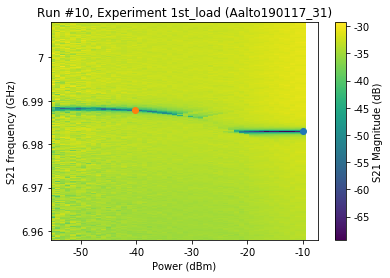

In [18]:
get_pushed_cavity_settings(from_saved_data=True, runid=10, power_stop=-45, power_step=5)

Explantory text: spectroscopy

In [20]:
#spectroscopy example goes here

Explanatory text: optimization based on readout fidelity

In [16]:
test = make_optimization_method(ReadoutFidelityOptimization, BestNeighbour, get_measured_data)

In [5]:
load_by_id(15)

results #15@/Users/Lillian/experiments.db
-----------------------------------------
rs_qubit_power - numeric
rs_qubit_frequency - numeric
max_separation - numeric

([<matplotlib.axes._subplots.AxesSubplot at 0x1120f45c0>],
 [<matplotlib.colorbar.Colorbar at 0x11e6d48d0>])

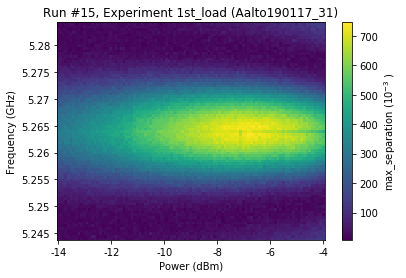

In [8]:
plot_by_id(15)

In [15]:
test.measured_params = {'max_separation': {'label': 'Readout Fidelity', 'unit': ''}}

In [16]:
start = {'rs_qubit_frequency': 5.255e9, 'rs_qubit_power':-6}
test.optimize('rs_qubit_frequency', 0.5e6, 'rs_qubit_power', 0.1, start=start, runid=15)

Starting experimental run with id: 52
Best: {'rs_qubit_frequency': 5263500000.0, 'rs_qubit_power': -6.7, 'max_separation': array([0.74133333])}


([<matplotlib.axes._subplots.AxesSubplot at 0x111e66e80>],
 [<matplotlib.colorbar.Colorbar at 0x11e78e8d0>])

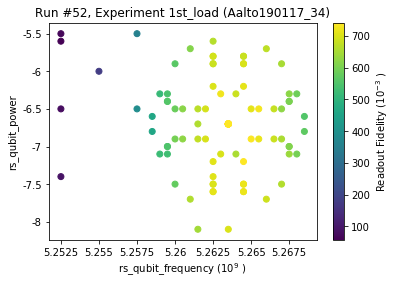

In [17]:
plot_by_id(52)